In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

In [8]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

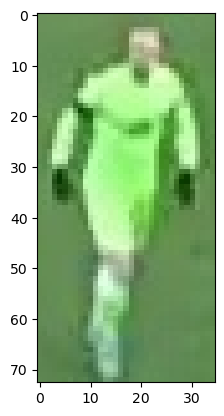

In [9]:
plt.imshow(image)
plt.show()

Get the top half of the image

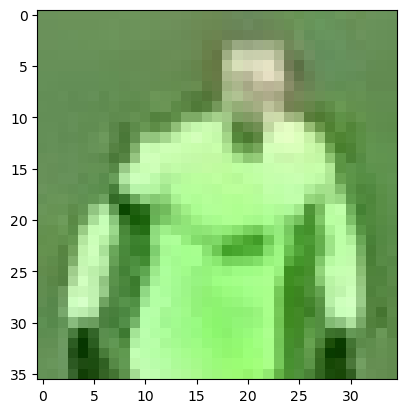

In [10]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

# KMeans Clustering to differentiate the player jersey and background, therefore the number of clusters should be 2

In [13]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(top_half_image.reshape(-1, 3))

labels = kmeans.labels_ # Either cluster 0 or cluster 1

c:\Users\veere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\veere\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


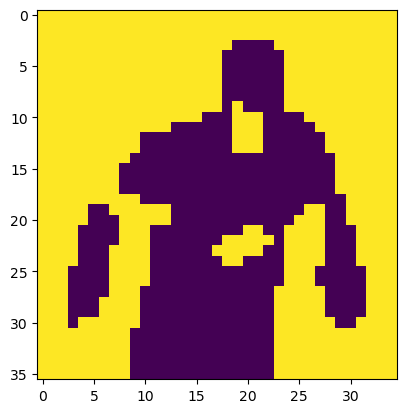

In [16]:
# Reshsape the labels to the shape of the image
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Plot the image
plt.imshow(clustered_image)
plt.show()

In [26]:
# Clusters of corners of the image
cluster_corners = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(cluster_corners), key=cluster_corners.count)
non_player_cluster

1

In [27]:
player_cluster = 1 - non_player_cluster

In [28]:
kmeans.cluster_centers_[player_cluster]

array([173.16701461, 237.95407098, 148.2045929 ])